<a href="https://colab.research.google.com/github/HaninEssam215/Crop-Recommendation-System/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [32]:
!pip install category_encoders==2.6.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import BinaryEncoder

#Skip warnings

In [94]:
import warnings
warnings.filterwarnings('ignore')



#Read Data

In [58]:
DF = pd.read_csv('/content/Crop_recommendation.csv')

#EDA

In [59]:
DF.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [60]:
DF.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [61]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [62]:
DF['label'].nunique()

22

In [63]:
DF['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


##Renaming the columns

In [67]:
DF.rename(columns={'label': 'crop'}, inplace=True)


In [68]:
DF

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


##Encoding crops

In [95]:
transformed_crop_df = BinaryEncoder().fit_transform(DF[['crop']])

In [96]:
transformed_crop_df

,crop_0,crop_1,crop_2,crop_3,crop_4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
2195,1,0,1,1,0
2196,1,0,1,1,0
2197,1,0,1,1,0
2198,1,0,1,1,0


In [97]:
DF2 = pd.concat([DF, transformed_crop_df], axis=1)

In [98]:
DF2

,N,P,K,temperature,humidity,ph,rainfall,crop,crop_0,crop_1,crop_2,crop_3,crop_4
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0,0,0,0,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0,0,0,0,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0,0,0,0,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0,0,0,0,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,1,0,1,1,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1,0,1,1,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,1,0,1,1,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1,0,1,1,0


##Outliers

We will not remove the outliers, because in our case, outliers are a natural part of the data distribution and removing them can significantly impact the model's ability to generalize.

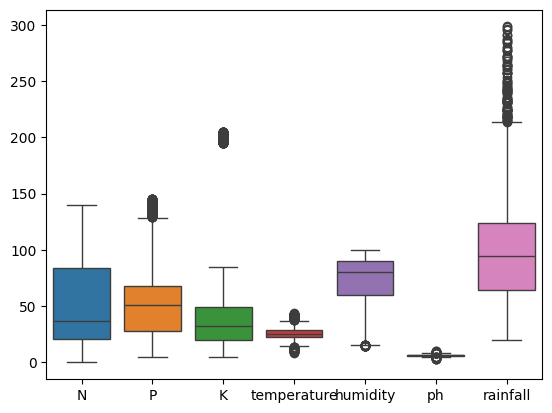

In [99]:
# Select columns excluding 'crop'
cols_to_plot = [col for col in DF.columns if col != 'crop']

# Box plot
sns.boxplot(data=DF[cols_to_plot])
plt.show()